In [1]:
!pip install tensorflow matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to add channel dimension (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 digits: 0–9
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.8738 - loss: 0.4166 - val_accuracy: 0.9840 - val_loss: 0.0512
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9754 - loss: 0.0799 - val_accuracy: 0.9850 - val_loss: 0.0439
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9830 - loss: 0.0561 - val_accuracy: 0.9895 - val_loss: 0.0322
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9866 - loss: 0.0427 - val_accuracy: 0.9896 - val_loss: 0.0304
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 58ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9906 - val_loss: 0.0271


In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9882 - loss: 0.0331
Test accuracy: 0.9905999898910522


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


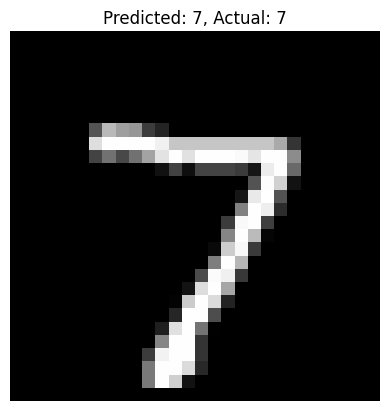

In [6]:
import numpy as np

# Predict a sample
predictions = model.predict(X_test)
predicted_label = np.argmax(predictions[0])

# Show image and predicted label
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[0]}")
plt.axis('off')
plt.show()
